In [10]:
import string
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv('poems.csv')

In [12]:
df['poem'] = df['poem'].str.findall(r"\w+-\w+|[\w']+|\|")\
    .apply(lambda x: ' '.join(x).lower() if type(x)==list else '')

df['poem'] = df['poem'].apply(lambda x: x.lower() if type(x)==str else '')
df = df[~df['poem'].str.contains('і')]
df['poem'] = df['poem'].apply(lambda x: x.lower()).apply(lambda x: x.split('|'))

In [13]:
def clear_residual_spaces(poem_list):
    clean_poem = []
    for line in poem_list:
        clean_line = ' '.join([x for x in line.split() if len(x)>0])
        clean_poem.append(clean_line)
    return clean_poem

def clear_lines_with_numbers(poem_list):
    clean_poem = []
    for line in poem_list:
        if not any([True for x in line if x in '1234567890']):
            clean_poem.append(line)
    return clean_poem

def clear_lines_with_links(poem_list):
    clean_poem = []
    for line in poem_list:
        if 'http' not in line:
            clean_poem.append(line)
    return clean_poem

def clear_short_lines(poem_list, n_times_lower=4):
    clean_poem = []
    if len(poem_list)==0:
        clean_poem = np.nan
    else:
        avg_line_len = sum([len(x) for x in poem_list])/len(poem_list)
        for line in poem_list:
            if len(line) > avg_line_len//n_times_lower:
                clean_poem.append(line)
    return clean_poem

df['poem'] = df['poem'].apply(clear_residual_spaces)
df['poem'] = df['poem'].apply(clear_lines_with_links)
df['poem'] = df['poem'].apply(clear_lines_with_numbers)
df['poem'] = df['poem'].apply(clear_short_lines)
df.dropna(inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021829821A20>,
      dtype=object)

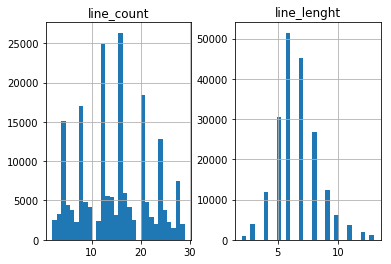

In [14]:
df['line_count'] = df['poem'].apply(lambda x: len(x))
df = df[df['line_count']>1]
df = df[df['line_count']<df['line_count'].quantile(0.85)]

df['line_lenght'] = df['poem'].apply(lambda x: max([len(y.split()) for y in x]))
df = df[(df['line_lenght']<14)&(df['line_lenght']>=2)]

df[['line_count', 'line_lenght']].hist(bins=30)

In [49]:
df[['poem']].to_csv('poems_processed.csv', index=False)

C:\Users\Valeric\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [14]:
df[df['line_count']==2]['poem'].sample(5).values

array([list(['неизвестный гражданин вдруг её разбередил', 'её этот гражданин сексом сзади наградил']),
       list(['единожды солгавши ты прощаешься с лицом', 'и многожды встречаешься с зеркальным но лжецом']),
       list(['картошка в мундире и баночка мёда', 'а вкусно вы не пробовали']),
       list(['легкий способ бросить пить курить и материться', 'надо попросту в россии не родиться']),
       list(['радиостанция business fm сравнила российские пенсии с мировыми', 'сведения взяты из открытых источников'])],
      dtype=object)

In [40]:
df[df['poem'].apply(lambda x: ''.join(x)).str.contains('на спине полосочки')]['poem'].values

array([list(['а у нашей кошечки', 'на спине полосочки', 'черная и серая', 'и маленькая белая', 'рыженькие лапки', 'когти цап-царапки', 'серенький бочок', 'шершавый язычок', 'рано утречком встаёт', 'спать нам долго не даёт', 'и играет и мяучит', 'не проснёмся так замучит', 'дайте кошечки поесть', 'в холодильнике что есть', 'там колбаска там сосиски', 'рыбка мясико ириски', 'нет ириски-не еда', 'мясико давай сюда', 'рыбку свежую икру', 'только этого я жду'])],
      dtype=object)

In [6]:
len(df)

220

1068      2
1448      2
1714      3
2370      2
3823      2
6904      2
6953      2
8640      3
8960      1
9430      1
10296     2
10519     2
10760     1
10772     3
10849     2
11187     2
11535     2
12397     2
12506     2
12604     2
13214     1
16050     2
16839     2
17137     2
17278     2
19125     2
20610     1
20651     1
20891     2
23319     2
         ..
204949    2
206033    2
206351    2
207575    2
209129    2
210561    2
212279    2
215091    2
215927    1
216257    2
216747    2
216879    2
218217    4
218643    2
220073    1
223527    2
223641    2
223919    2
225462    2
226529    2
232627    3
233257    2
236464    1
236688    2
237601    2
237768    1
245383    2
248058    2
248749    2
250014    2
Name: poem, Length: 220, dtype: int64